### ✅ Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
import catboost
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

### ✅ Step 2: Load and Prepare Data
load two datasets (df1, df2) and make sure they have the same format.

In [3]:
df1 = pd.read_csv("datasets/rainfall_2/Rainfall.csv")
df2 = pd.read_csv("datasets/rainfall_2/train.csv")
test_df = pd.read_csv('datasets/rainfall_2/test.csv')

df1.columns = df1.columns.str.strip()
df1['rainfall'] = df1['rainfall'].str.lower().map({'yes': 1, 'no': 0})
df2 = df2.drop(columns=['id'])

# Reorder columns to make them match
column_order = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
                'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']
df1 = df1[column_order]
df2 = df2[column_order]

train_df = pd.concat([df1, df2], ignore_index=True)


In [4]:
# from sklearn.model_selection import train_test_split

# df = pd.read_csv("datasets/rainfall/train.csv")
# train_df, test_df = train_test_split(df, test_size=0.2)
# # valid_df, test_df = train_test_split(test_df, test_size=0.5)

# train_df.to_csv("datasets/rainfall_2/train.csv", sep=',', index=False)
# # valid_df.to_csv("datasets/rainfall_2/valid.csv", sep=',', index=False)
# test_df.to_csv("datasets/rainfall_2/test.csv", sep=',', index=False)

In [5]:
# Drop 'id' column from train and test datasets
train_df.drop(columns=['id'], inplace=True, errors='ignore')
# valid_df.drop(columns=['id'], inplace=True, errors='ignore')
test_df.drop(columns=['id'], inplace=True, errors='ignore')


### 

### ✅ Step 3: EDA

In [6]:
train_df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,9.3,80.0,26.3,1
1,2,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,0.6,50.0,15.3,1
2,3,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,0.0,40.0,14.2,1
3,4,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,1.0,50.0,16.9,1
4,5,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,0.0,40.0,13.7,1


In [7]:
train_df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2117.000000,2117.000000,2118.000000
mean,150.356468,1013.590699,26.379698,23.946553,22.137252,20.363126,81.593484,74.480170,3.954769,104.671847,21.696552,0.737016
std,113.117443,5.790749,5.734466,5.331488,5.204025,5.470789,8.355103,19.059198,3.735444,80.799070,9.923292,0.440358
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000,0.000000
25%,33.000000,1008.500000,21.300000,19.300000,17.600000,16.725000,77.000000,66.000000,0.400000,40.000000,14.000000,0.000000
50%,140.000000,1013.000000,27.800000,25.500000,23.900000,22.100000,81.000000,82.000000,2.500000,70.000000,20.500000,1.000000
75%,248.750000,1017.800000,31.200000,28.400000,26.500000,25.000000,87.000000,88.000000,7.400000,200.000000,27.400000,1.000000
max,365.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000,1.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2118 non-null   int64  
 1   pressure       2118 non-null   float64
 2   maxtemp        2118 non-null   float64
 3   temparature    2118 non-null   float64
 4   mintemp        2118 non-null   float64
 5   dewpoint       2118 non-null   float64
 6   humidity       2118 non-null   float64
 7   cloud          2118 non-null   float64
 8   sunshine       2118 non-null   float64
 9   winddirection  2117 non-null   float64
 10  windspeed      2117 non-null   float64
 11  rainfall       2118 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 198.7 KB


In [9]:
# valid_df.info()

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            438 non-null    int64  
 1   pressure       438 non-null    float64
 2   maxtemp        438 non-null    float64
 3   temparature    438 non-null    float64
 4   mintemp        438 non-null    float64
 5   dewpoint       438 non-null    float64
 6   humidity       438 non-null    float64
 7   cloud          438 non-null    float64
 8   sunshine       438 non-null    float64
 9   winddirection  438 non-null    float64
 10  windspeed      438 non-null    float64
 11  rainfall       438 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 41.2 KB


In [11]:
# Check for missing values in test and train
print("Does test_df have missing values?", test_df.isnull().sum().any())
# print("Does valid_df have missing values?", valid_df.isnull().sum().any())
print("Does train_df have missing values?", train_df.isnull().sum().any())


print("Missing values in test_df:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

# print("\nMissing values in valid_df:")
# print(train_df.isnull().sum()[valid_df.isnull().sum() > 0])

print("\nMissing values in train_df:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


Does test_df have missing values? False
Does train_df have missing values? True
Missing values in test_df:
Series([], dtype: int64)

Missing values in train_df:
winddirection    1
windspeed        1
dtype: int64


### ✅ Step 4: Clean Missing Data
Fill in missing values (mean imputation).

In [12]:
train_df = train_df.fillna(train_df.mean())
# valid_df = valid_df.fillna(valid_df.mean())
test_df = test_df.fillna(test_df.mean())

In [13]:
# Check for missing values in test and train
print("Does test_df have missing values?", test_df.isnull().sum().any())
# print("Does valid_df have missing values?", valid_df.isnull().sum().any())
print("Does train_df have missing values?", train_df.isnull().sum().any())


print("Missing values in test_df:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

# print("\nMissing values in valid_df:")
# print(valid_df.isnull().sum()[valid_df.isnull().sum() > 0])

print("\nMissing values in train_df:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


Does test_df have missing values? False
Does train_df have missing values? False
Missing values in test_df:
Series([], dtype: int64)

Missing values in train_df:
Series([], dtype: int64)


In [14]:
def get_season(day):
    if 80 <= day <= 171:
        return "spring"
    elif 172 <= day <= 263:
        return "summer"
    elif 264 <= day <= 354:
        return "fall"
    else:
        return "winter"
        
train_df["season"] = train_df["day"].apply(get_season)
test_df["season"] = test_df["day"].apply(get_season)
# valid_df["season"] = valid_df["day"].apply(get_season)

train_df["temp_range"] = train_df["maxtemp"] - train_df["mintemp"]
test_df["temp_range"] = test_df["maxtemp"] - test_df["mintemp"]
# valid_df["temp_range"] = valid_df["maxtemp"] - valid_df["mintemp"]

train_df["dew_humidity_ratio"] = train_df["dewpoint"] / (train_df["humidity"] + 1e-5)
test_df["dew_humidity_ratio"] = test_df["dewpoint"] / (test_df["humidity"] + 1e-5)
# valid_df["dew_humidity_ratio"] = valid_df["dewpoint"] / (valid_df["humidity"] + 1e-5)

train_df["temp_dew_diff"] = train_df["temparature"] - train_df["dewpoint"]
test_df["temp_dew_diff"] = test_df["temparature"] - test_df["dewpoint"]
# valid_df["temp_dew_diff"] = valid_df["temparature"] - valid_df["dewpoint"]

train_df["cloud_sun_ratio"] = train_df["cloud"] / (train_df["sunshine"] + 1e-5)
test_df["cloud_sun_ratio"] = test_df["cloud"] / (test_df["sunshine"] + 1e-5)
# valid_df["cloud_sun_ratio"] = valid_df["cloud"] / (valid_df["sunshine"] + 1e-5)

train_df["low_sun"] = (train_df["sunshine"] < 1).astype(int)
test_df["low_sun"] = (test_df["sunshine"] < 1).astype(int)
# valid_df["low_sun"] = (valid_df["sunshine"] < 1).astype(int)

train_df["cloud_humidity"] = train_df["humidity"] * train_df["cloud"]
test_df["cloud_humidity"] = test_df["humidity"] * test_df["cloud"]
# valid_df["cloud_humidity"] = valid_df["humidity"] * valid_df["cloud"]

train_df["temp_humidity"] = train_df["humidity"] * train_df["temp_dew_diff"]
test_df["temp_humidity"] = test_df["humidity"] * test_df["temp_dew_diff"]
# valid_df["temp_humidity"] = valid_df["humidity"] * valid_df["temp_dew_diff"]

season_map = {"winter": 0, "spring": 1, "summer": 2, "fall": 3}

train_df["season_num"] = train_df["season"].map(season_map)
test_df["season_num"] = test_df["season"].map(season_map)
# valid_df["season_num"] = valid_df["season"].map(season_map)

train_df["cloud_sun_season"] = train_df["cloud_sun_ratio"] * train_df["season_num"]
test_df["cloud_sun_season"] = test_df["cloud_sun_ratio"] * test_df["season_num"]
# valid_df["cloud_sun_season"] = valid_df["cloud_sun_ratio"] * valid_df["season_num"]

train_df["cloud_sun_intersect"] = train_df["cloud"] * train_df["sunshine"]
test_df["cloud_sun_intersect"] = test_df["cloud"] * test_df["sunshine"]
# valid_df["cloud_sun_intersect"] = valid_df["cloud"] * valid_df["sunshine"]

train_df["cloud_humidity_intersect"] = train_df["cloud"] * train_df["humidity"]
test_df["cloud_humidity_intersect"] = test_df["cloud"] * test_df["humidity"]
# valid_df["cloud_humidity_intersect"] = valid_df["cloud"] * valid_df["humidity"]

train_df["cloud_sun_intersect"] = train_df["cloud"] / (train_df["sunshine"] + 1e-3)
test_df["cloud_sun_intersect"] = test_df["cloud"] / (test_df["sunshine"] + 1e-3)
# valid_df["cloud_sun_intersect"] = valid_df["cloud"] / (valid_df["sunshine"] + 1e-3)

train_df["humidity_dewpoint_intersect"] = train_df["humidity"] * train_df["dewpoint"]
test_df["humidity_dewpoint_intersect"] = test_df["humidity"] * test_df["dewpoint"]
# valid_df["humidity_dewpoint_intersect"] = valid_df["humidity"] * valid_df["dewpoint"]

train_df["sun_wind_intersect"] = train_df["sunshine"] / (train_df["windspeed"] + 1e-3)
test_df["sun_wind_intersect"] = test_df["sunshine"] / (test_df["windspeed"] + 1e-3)
# valid_df["sun_wind_intersect"] = valid_df["sunshine"] / (valid_df["windspeed"] + 1e-3)

train_df["cloud_low_sun_intersect"] = train_df["cloud"] * train_df["low_sun"]
test_df["cloud_low_sun_intersect"] = test_df["cloud"] * test_df["low_sun"]
# valid_df["cloud_low_sun_intersect"] = valid_df["cloud"] * valid_df["low_sun"]

bool_cols = train_df.select_dtypes(include='bool').columns

for col in bool_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)
    # valid_df[col] = valid_df[col].astype(int)
    
train_df = train_df.drop(["season"], axis=1)
test_df = test_df.drop(["season"], axis=1)
# valid_df = valid_df.drop(["season"], axis=1)

test_df["winddirection"].fillna(test_df["winddirection"].mean(), inplace=True)
# valid_df["winddirection"].fillna(valid_df["winddirection"].mean(), inplace=True)


### ✅ Step 5: Prepare Features & Labels
Split into X (features) and y (target):

In [15]:
X = train_df.drop(columns=['rainfall'])
y = train_df['rainfall']


In [16]:
# print(X.columns)

### ✅ Step 6: Standardize Data
Helps models perform better:

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### ✅ Step 7: Purged Cross Validation
Use time-based splitting to prevent data leakage.

In [18]:
def purged_cross_validation(X, y, n_splits=5, purge_length=1):
    ts_split = TimeSeriesSplit(n_splits=n_splits)
    for train_idx, val_idx in ts_split.split(X):
        val_idx = val_idx[val_idx >= train_idx[-purge_length]]
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        yield X_train, X_val, y_train, y_val


### ✅ Step 8: Define & Train Model
You use a soft-voting ensemble of three strong models.

In [19]:
# Define all tuned models
l1 = LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=1000)
l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=6, learning_rate=0.1)
cat = CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, depth=6)
svc = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
et = ExtraTreesClassifier(n_estimators=100)
ann = MLPClassifier(hidden_layer_sizes=(3, 5), activation='relu', solver='adam', max_iter=1000)

# Define the voting classifier
model = VotingClassifier(
    estimators=[
        ('l1', l1),
        ('l2', l2),
        ('xgb', xgb),
        ('cat', cat),
        ('svc', svc),
        ('rf', rf),
        ('et', et),
        ('ann', ann)
    ],
    voting='soft'
)


In [20]:
# Assuming X_scaled and y are already defined
for fold_idx, (X_train, X_val, y_train, y_val) in enumerate(purged_cross_validation(X_scaled, y)):
    print(f"\n--- Fold {fold_idx + 1} ---")
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    probas = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    fpr, tpr, _ = roc_curve(y_val, probas)
    roc_auc = auc(fpr, tpr)

    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("AUC:", roc_auc)



--- Fold 1 ---
Accuracy: 0.8328611898016998
F1 Score: 0.8936936936936937
AUC: 0.8740281224152191

--- Fold 2 ---
Accuracy: 0.8413597733711048
F1 Score: 0.8985507246376812
AUC: 0.9019684696455011

--- Fold 3 ---
Accuracy: 0.8980169971671388
F1 Score: 0.9333333333333333
AUC: 0.9119560625264047

--- Fold 4 ---
Accuracy: 0.8753541076487252
F1 Score: 0.9197080291970803
AUC: 0.9015755000885113

--- Fold 5 ---
Accuracy: 0.8838526912181303
F1 Score: 0.9242144177449167
AUC: 0.9065906210392902


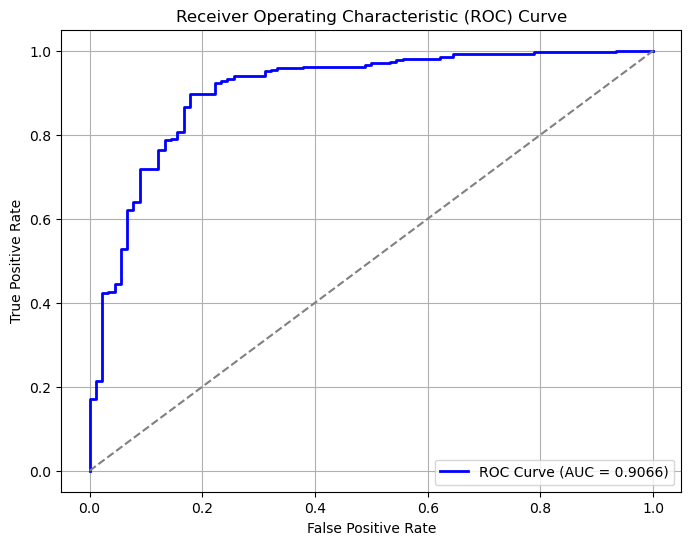

In [21]:

roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### ✅ Step 9: Final Training & Submission


In [22]:
# Scale
# test_df['rainfall'] = test_df['rainfall'].str.lower().map({'yes': 1, 'no': 0})
target = test_df['rainfall'].values
del test_df['rainfall']
# column_order = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
#        'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
#        'temp_range', 'dew_humidity_ratio', 'temp_dew_diff', 'cloud_sun_ratio',
#        'low_sun', 'cloud_humidity', 'temp_humidity', 'season_num',
#        'cloud_sun_season', 'cloud_sun_intersect', 'cloud_humidity_intersect',
#        'humidity_dewpoint_intersect', 'sun_wind_intersect',
#        'cloud_low_sun_intersect']
# X_test_scaled = scaler.transform(test_df[column_order])
X_test_scaled = scaler.transform(test_df)

# Fit final model on full training data
model.fit(X_scaled, y)

# Ensure X_test_scaled has correct column names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Predict probabilities
# preds_test = model.predict_proba(X_test_scaled)[:, 1]

predicted = model.predict(X_test_scaled)

from sklearn import metrics
print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))


              precision    recall  f1-score   support

           0       0.78      0.53      0.63       100
           1       0.87      0.96      0.91       338

    accuracy                           0.86       438
   macro avg       0.83      0.74      0.77       438
weighted avg       0.85      0.86      0.85       438

[[ 53  47]
 [ 15 323]]
